In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-machine-learning-from-disaster/train.csv
/kaggle/input/titanic-machine-learning-from-disaster/test.csv


In [80]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
# ignore all warnings
warnings.filterwarnings('ignore')

In [81]:
train=pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/train.csv')
test=pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/test.csv')

In [82]:
print("train data")
print(train.shape)
train.head()

train data
(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
print("test data")
print(test.shape)
test.head()

test data
(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data cleaning and preprocessing

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [85]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [86]:
train.duplicated().sum()

np.int64(0)

In [87]:
print(train.isnull().sum())
print('--------------------')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
--------------------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [88]:
# Drop columns that are not needed
train = train.drop(['Ticket','PassengerId' , 'Cabin'], axis=1)
test = test.drop(['Ticket','PassengerId' , 'Cabin'], axis=1)

In [89]:
# handling missed values
train['Age'].fillna(train['Age'].mean() , inplace=True)
test['Age'].fillna(train['Age'].mean() , inplace=True)

In [90]:
train['Embarked'].fillna(train['Embarked'].mode()[0] , inplace = True)
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [91]:
print(train.isnull().sum())
print('--------------------')
print(test.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
--------------------
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


### EDA

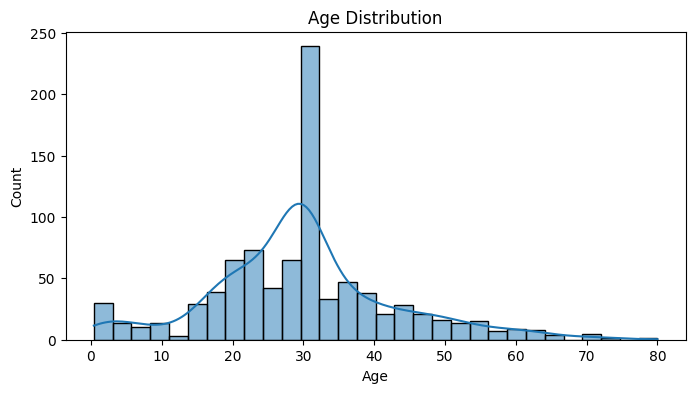

In [93]:
# Age distribution
plt.figure(figsize=(8,4))
sns.histplot(train['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

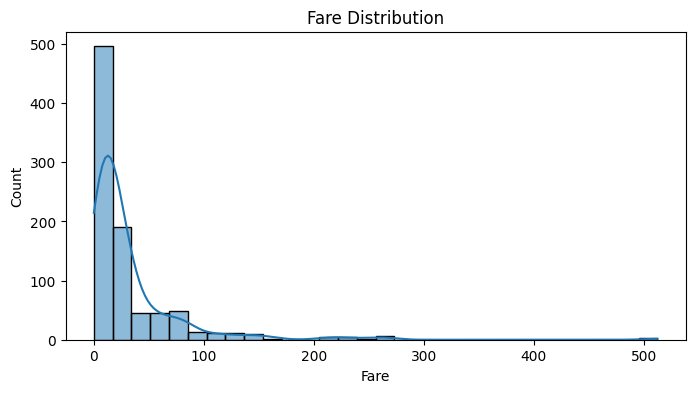

In [94]:
# Fare distribution
plt.figure(figsize=(8,4))
sns.histplot(train['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

In [95]:
train["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

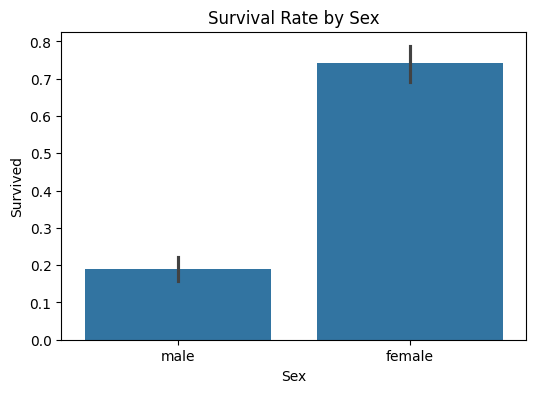

In [96]:
# Survival by Sex
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Sex')
plt.show()

Although there were more males on board, the survival rate for females was much higher. This shows that gender played a significant role in survival

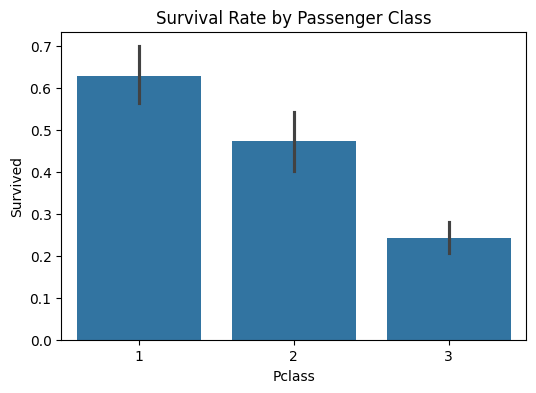

In [97]:
# Survival by Pclass
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.show()

the suvivors of 1st class is the most

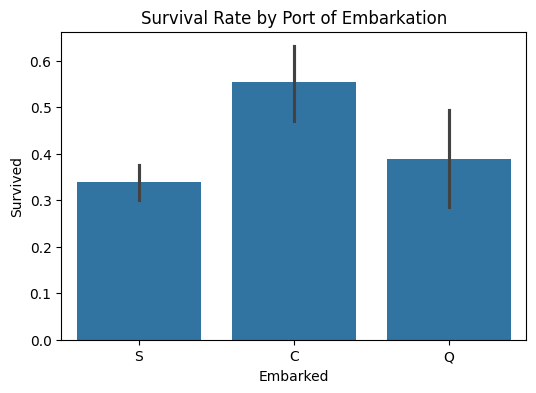

In [98]:
# Survival by Embarked
plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=train)
plt.title('Survival Rate by Port of Embarkation')
plt.show()

### Feature Engineering

In [99]:
# Title extraction
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')
# Family size
train['Family_size'] = train['SibSp'] + train['Parch'] + 1

test['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.')
# Family size
test['Family_size'] = train['SibSp'] + train['Parch'] + 1

In [100]:
train.drop(columns=['Parch','SibSp','Name'],inplace=True)
test.drop(columns=['Parch','SibSp', 'Name'],inplace=True)

In [101]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family_size
0,0,3,male,22.0,7.2500,S,Mr,2
1,1,1,female,38.0,71.2833,C,Mrs,2
2,1,3,female,26.0,7.9250,S,Miss,1
3,1,1,female,35.0,53.1000,S,Mrs,2
4,0,3,male,35.0,8.0500,S,Mr,1


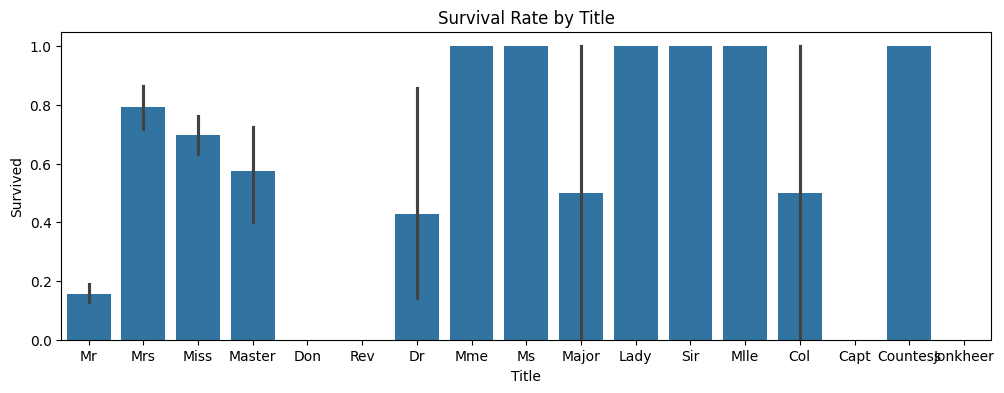

In [102]:
# Survival by Title
plt.figure(figsize=(12,4))
sns.barplot(x='Title', y='Survived', data=train)
plt.title('Survival Rate by Title')
plt.show()

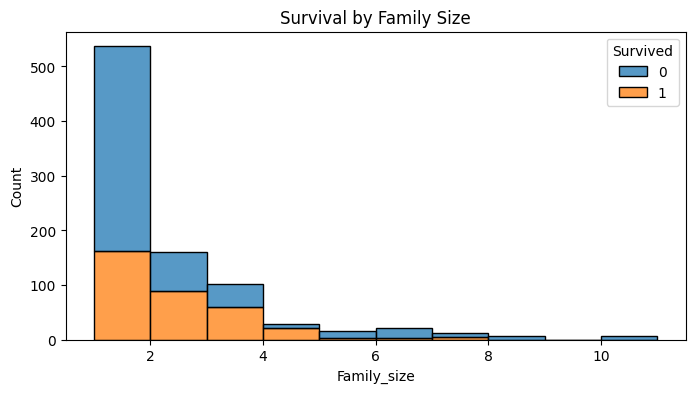

In [103]:
# Survival by Family size
plt.figure(figsize=(8,4))
sns.histplot(data=train, x='Family_size', hue='Survived', multiple='stack', bins=10)
plt.title('Survival by Family Size')
plt.show()

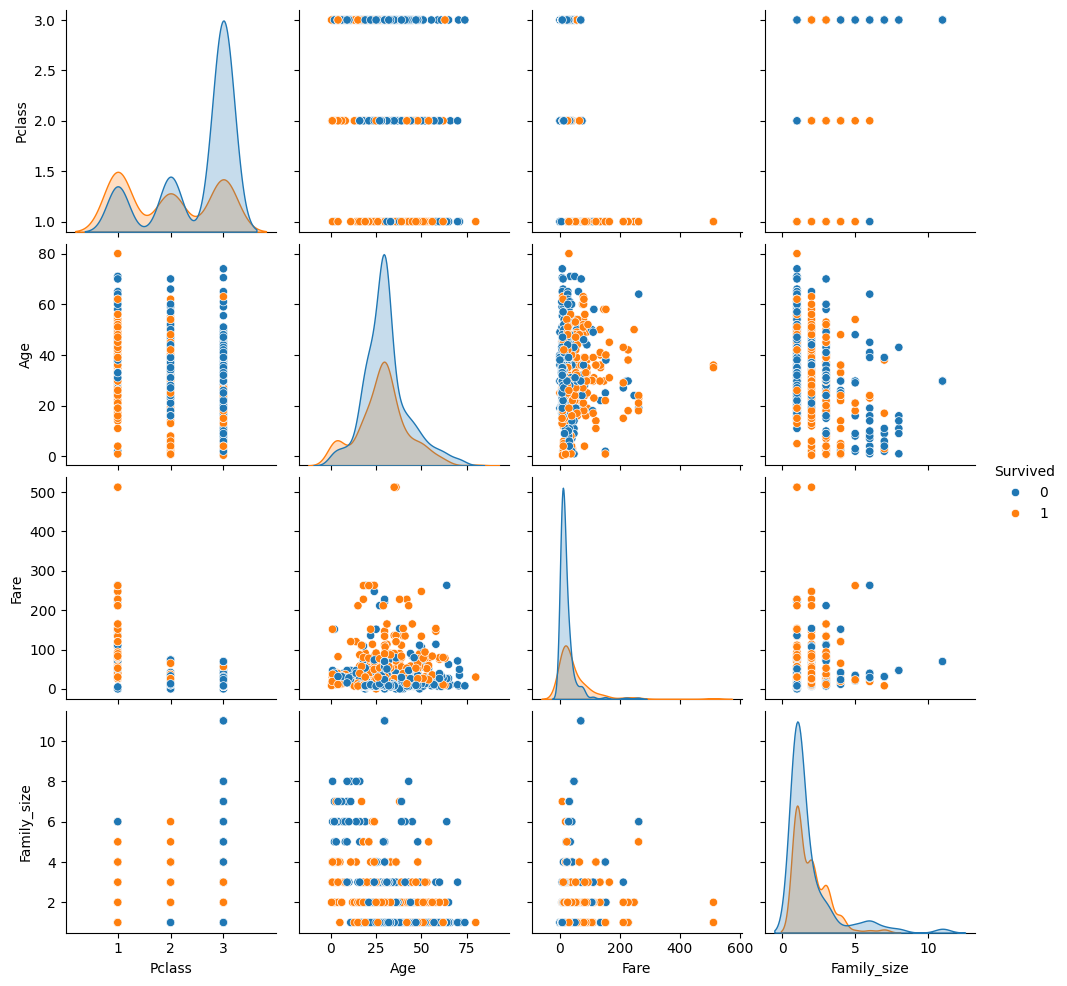

In [104]:
sns.pairplot(train,hue='Survived');

* Women and children survived more than men.

* Passengers in higher classes (1st class) had higher survival rates.

* Higher fares (usually 1st class) correlate with higher survival.

* Small families had better chances of survival than alone or very large families.

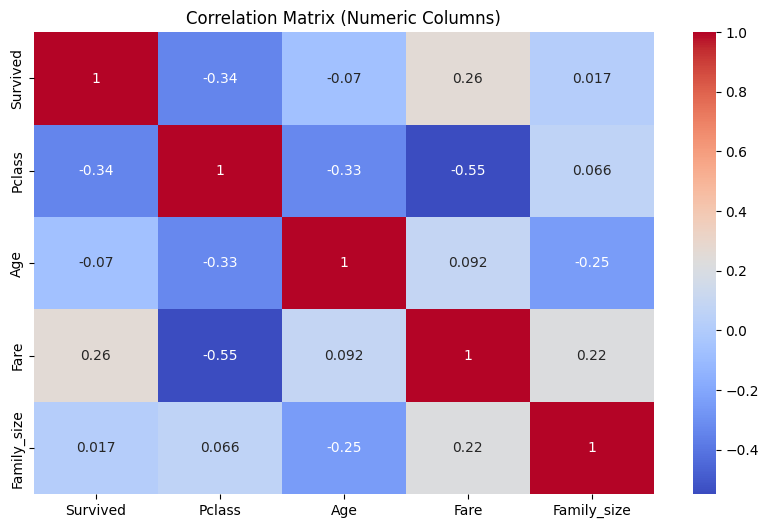

In [105]:
numeric_cols = train.select_dtypes(include=['int64','float64'])
corr = numeric_cols.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Numeric Columns)')
plt.show()

### Encoding

In [106]:
# One-Hot Encoding
train = pd.get_dummies(train, columns=['Sex','Embarked'], drop_first=True)
test  = pd.get_dummies(test, columns=['Sex','Embarked'], drop_first=True)

In [107]:
#label encoding 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train['Title'] = le.fit_transform(train['Title'])
test['Title']  = le.transform(test['Title'])

In [108]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_features = ['Age', 'Fare', 'Family_size']

train[num_features] = scaler.fit_transform(train[num_features])
test[num_features]  = scaler.transform(test[num_features])

### Building the model

In [109]:
X=train.drop(['Survived'] , axis=1)
# Target
y = train['Survived']

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [111]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [112]:
X_test=test

Accuracy: 0.7877094972067039
[[96 14]
 [24 45]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       110
           1       0.76      0.65      0.70        69

    accuracy                           0.79       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.79      0.79      0.78       179



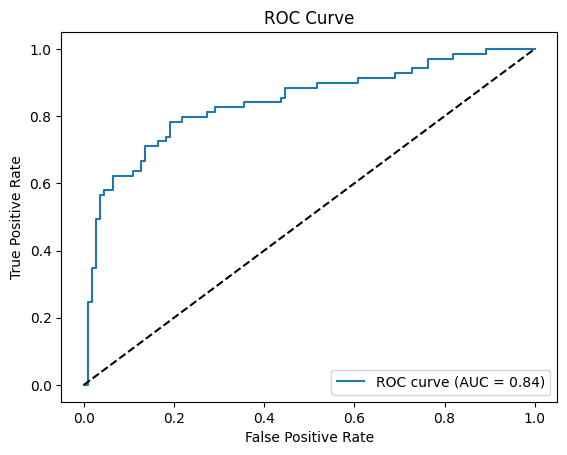

In [113]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Predictions
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:,1]

# Accuracy
print("Accuracy:", accuracy_score(y_val, y_pred))

# Confusion Matrix
print(confusion_matrix(y_val, y_pred))

# Classification Report
print(classification_report(y_val, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_prob)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc_score(y_val, y_prob))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


* Model achieved 79% accuracy.

* Better performance on class 0 (did not survive).

* Lower recall for survivors indicates model misses some positive cases.

* ROC-AUC shows good class separability.

In [114]:
test_ids = pd.read_csv('/kaggle/input/titanic-machine-learning-from-disaster/test.csv')['PassengerId']

In [115]:
# Generate predictions on unseen test dataset
# The model has never seen this data before
# ---------------------------------------------------
test = test.reindex(columns=X_train.columns, fill_value=0)

test_pred = model.predict(test)
test_prob = model.predict_proba(test)[:, 1]


In [116]:
submission = pd.DataFrame({
    "PassengerId": test_ids,
    "Survived": test_pred
})

In [117]:
submission.to_csv("submission.csv", index=False)

In [118]:
# Analyze model behavior and predictions
# Understanding WHY the model predicts this way
# ---------------------------------------------------

analysis_df = test.copy()
analysis_df["Predicted_Survival"] = test_pred

# Survival rate by gender
analysis_df.groupby("Sex_male")["Predicted_Survival"].mean()

Sex_male
False    0.947368
True     0.056391
Name: Predicted_Survival, dtype: float64

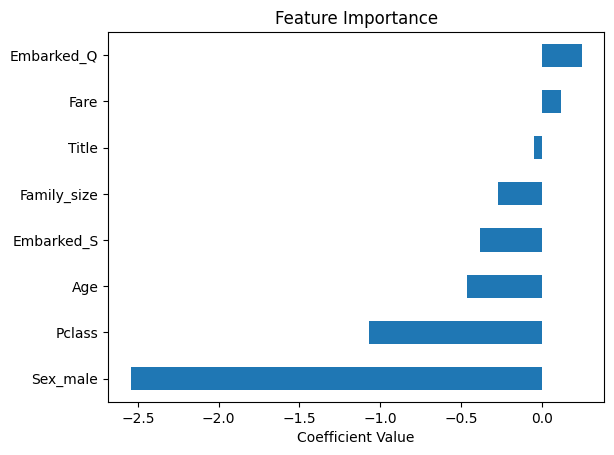

In [119]:
# Display feature importance from Logistic Regression
# Coefficients show impact strength and direction
# ---------------------------------------------------

importance = pd.Series(model.coef_[0], index=X_train.columns)
importance.sort_values().plot(kind='barh')

plt.title("Feature Importance")
plt.xlabel("Coefficient Value")
plt.show()

## Feature Importance Interpretation

The feature importance plot represents the coefficients learned by the Logistic Regression model.

- Positive coefficients increase the probability of survival.
- Negative coefficients decrease the probability of survival.
- Larger absolute values indicate stronger influence on predictions.

Key observations:

- **Sex_male** has the strongest negative impact, meaning males had a significantly lower survival probability.
- **Pclass** shows that passengers in lower classes were less likely to survive.
- **Age** has a negative relationship with survival, indicating younger passengers had better chances.
- **Family_size** slightly affects survival, suggesting social/family context mattered.
- **Fare** contributes positively, meaning wealthier passengers had higher survival chances.
- Engineered features such as **Title** helped the model capture social status patterns.
